In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
google_ads = pd.read_csv('googleads-performance.csv')

In [3]:
print(google_ads.head())

         Date    Campaign type  Impressions  Clicks    Cost  Conversions  \
0  2024-01-01    Cross-network     143669.0   896.0   656.3          6.5   
1  2024-01-01  Display Network          3.0     0.0     0.0          0.0   
2  2024-01-01   Search Network       3701.0   251.0   496.5          4.5   
3  2024-01-01          YouTube      36211.0     8.0   115.2          0.0   
4  2024-01-02    Cross-network     183496.0  1172.0  1525.0          8.8   

   Revenue  
0   1410.3  
1      0.0  
2    576.4  
3      0.0  
4   3565.7  


In [4]:
google_ads.isnull().any()



Date             False
Campaign type    False
Impressions      False
Clicks           False
Cost             False
Conversions      False
Revenue          False
dtype: bool

In [5]:
google_ads

,Date,Campaign type,Impressions,Clicks,Cost,Conversions,Revenue
0,2024-01-01,Cross-network,143669.0,896.0,656.3,6.5,1410.3
1,2024-01-01,Display Network,3.0,0.0,0.0,0.0,0.0
2,2024-01-01,Search Network,3701.0,251.0,496.5,4.5,576.4
3,2024-01-01,YouTube,36211.0,8.0,115.2,0.0,0.0
4,2024-01-02,Cross-network,183496.0,1172.0,1525.0,8.8,3565.7
...,...,...,...,...,...,...,...
709,2024-06-29,YouTube,27631.0,25.0,239.8,1.2,368.1
710,2024-06-30,Cross-network,315253.0,1919.0,1899.1,24.6,3742.4
711,2024-06-30,Display Network,36.0,0.0,0.2,0.0,0.0
712,2024-06-30,Search Network,4541.0,264.0,465.6,9.7,915.1


In [6]:
google_ads.isna().sum()

Date             0
Campaign type    0
Impressions      0
Clicks           0
Cost             0
Conversions      0
Revenue          0
dtype: int64

In [7]:
google_ads.dtypes

Date              object
Campaign type     object
Impressions      float64
Clicks           float64
Cost             float64
Conversions      float64
Revenue          float64
dtype: object

In [8]:
google_ads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           714 non-null    object 
 1   Campaign type  714 non-null    object 
 2   Impressions    714 non-null    float64
 3   Clicks         714 non-null    float64
 4   Cost           714 non-null    float64
 5   Conversions    714 non-null    float64
 6   Revenue        714 non-null    float64
dtypes: float64(5), object(2)
memory usage: 39.2+ KB


In [9]:
print("categories in 'Campaign type' variables:  ",end=" ")
print(google_ads["Campaign type"].unique())

categories in 'Campaign type' variables:   ['Cross-network' 'Display Network' 'Search Network' 'YouTube']


In [10]:
google_ads.nunique()

Date             182
Campaign type      4
Impressions      620
Clicks           350
Cost             531
Conversions      287
Revenue          380
dtype: int64

In [11]:
google_ads['Campaign type'].nunique()

4

In [12]:
google_ads.describe()

,Impressions,Clicks,Cost,Conversions,Revenue
count,714.000000,714.000000,714.000000,714.000000,714.000000
mean,103249.289916,668.372549,1194.405182,19.543697,4380.389916
std,169925.328248,925.830005,1457.968112,23.106973,5466.346579
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,3614.500000,0.000000,54.600000,0.000000,0.000000
50%,14576.500000,225.500000,414.850000,6.500000,1126.150000
75%,101861.000000,870.750000,2127.500000,38.975000,8763.650000
max,698237.000000,3690.000000,6218.300000,90.200000,24422.700000


In [13]:
#define numerical and categorical columns
numeric_features = [feature for feature in google_ads.columns if google_ads[feature].dtype != 'object']

categorical_features = [feature for feature in google_ads.columns if google_ads[feature].dtype == 'object']

#print columns
print('we have {} numerical features: {}'.format(len(numeric_features),numeric_features))
print('\nwe have {} categorical features: {}'.format(len(categorical_features),categorical_features))

we have 5 numerical features: ['Impressions', 'Clicks', 'Cost', 'Conversions', 'Revenue']

we have 2 categorical features: ['Date', 'Campaign type']


In [14]:
print("categories in 'test preparation course' variables:  ",end=" ")
print(google_ads["Campaign type"].unique())

categories in 'test preparation course' variables:   ['Cross-network' 'Display Network' 'Search Network' 'YouTube']


In [15]:
google_ads['profit'] = google_ads['Revenue'] - google_ads['Cost']
google_ads.head()

,Date,Campaign type,Impressions,Clicks,Cost,Conversions,Revenue,profit
0,2024-01-01,Cross-network,143669.0,896.0,656.3,6.5,1410.3,754.0
1,2024-01-01,Display Network,3.0,0.0,0.0,0.0,0.0,0.0
2,2024-01-01,Search Network,3701.0,251.0,496.5,4.5,576.4,79.9
3,2024-01-01,YouTube,36211.0,8.0,115.2,0.0,0.0,-115.2
4,2024-01-02,Cross-network,183496.0,1172.0,1525.0,8.8,3565.7,2040.7


In [16]:
google_ads[['Conversions','profit','Clicks','Impressions']]

,Conversions,profit,Clicks,Impressions
0,6.5,754.0,896.0,143669.0
1,0.0,0.0,0.0,3.0
2,4.5,79.9,251.0,3701.0
3,0.0,-115.2,8.0,36211.0
4,8.8,2040.7,1172.0,183496.0
...,...,...,...,...
709,1.2,128.3,25.0,27631.0
710,24.6,1843.3,1919.0,315253.0
711,0.0,-0.2,0.0,36.0
712,9.7,449.5,264.0,4541.0


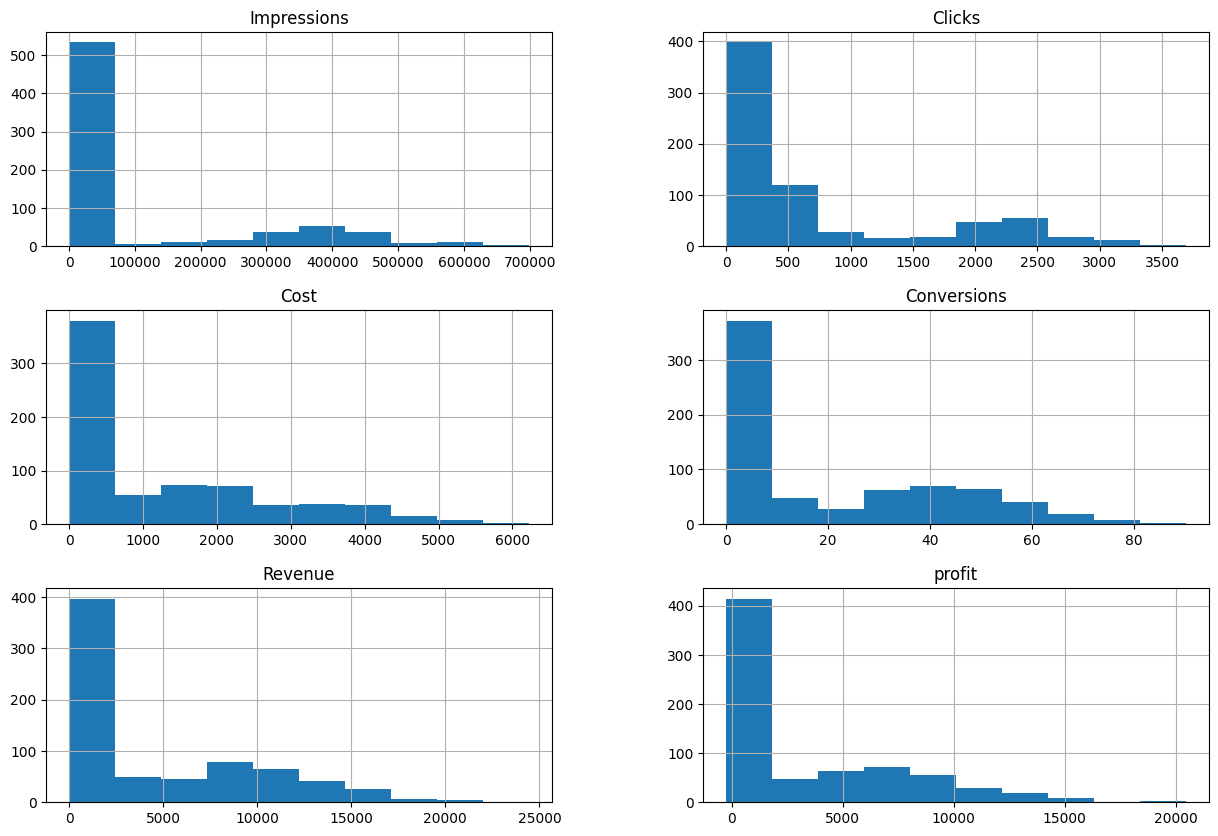

In [17]:
google_ads.hist(figsize=(15, 10))
plt.show()

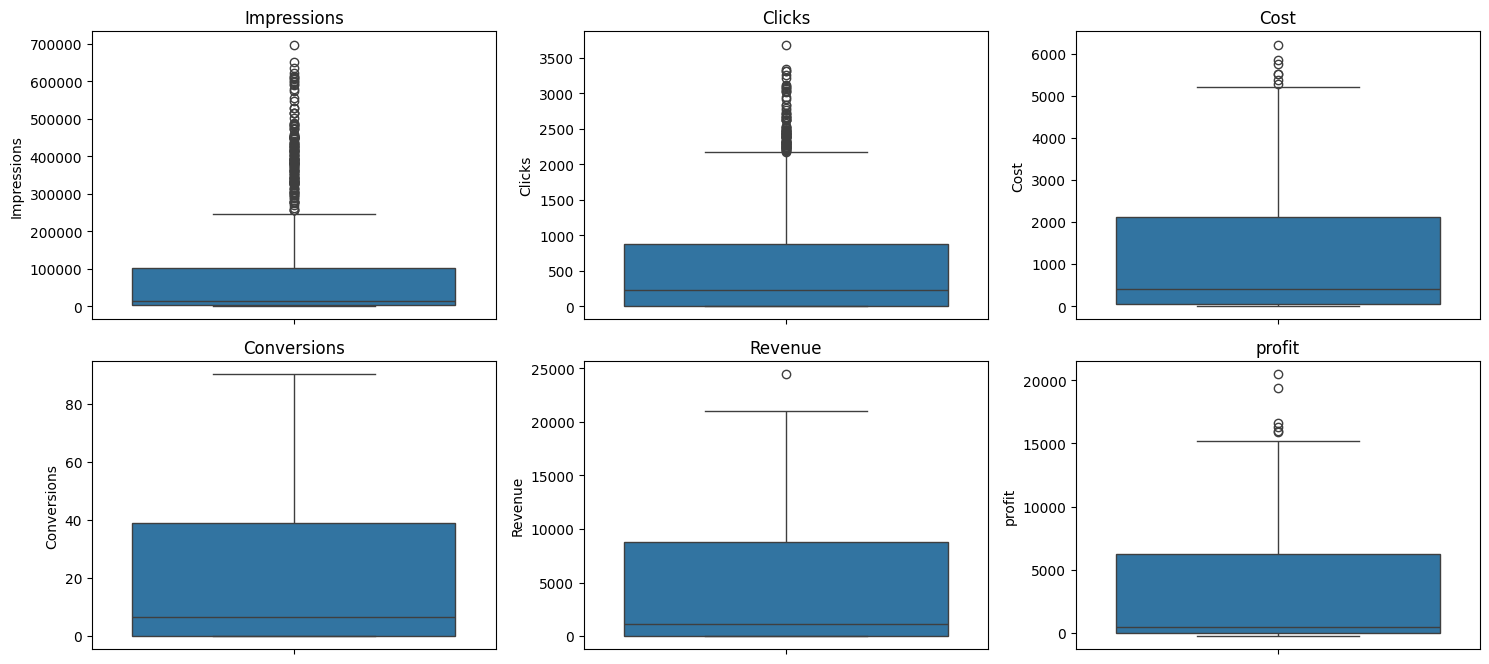

In [18]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(google_ads.select_dtypes(include=[np.number]).columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=google_ads[column])
    plt.title(column)
plt.tight_layout()
plt.show()


In [19]:
max_value = google_ads[['Cost','Revenue','Conversions','profit','Clicks']].max()

In [20]:
max_value

Cost            6218.3
Revenue        24422.7
Conversions       90.2
profit         20445.8
Clicks          3690.0
dtype: float64

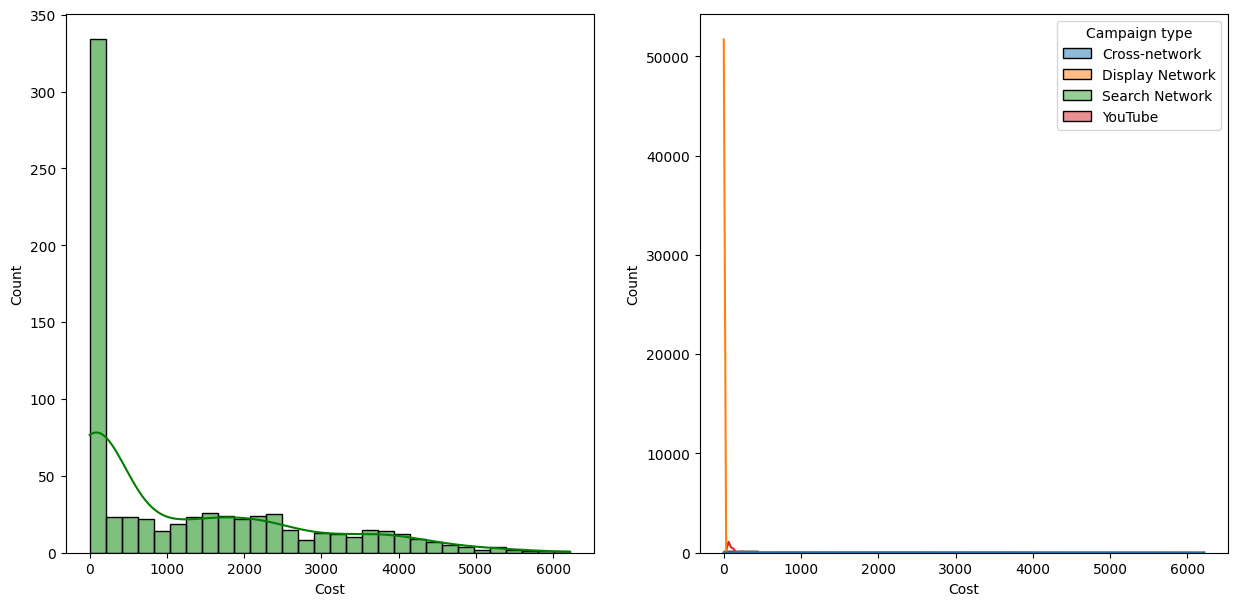

In [21]:
fig, axs = plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=google_ads,x='Cost',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=google_ads,x='Cost',kde=True,hue='Campaign type')
plt.show()

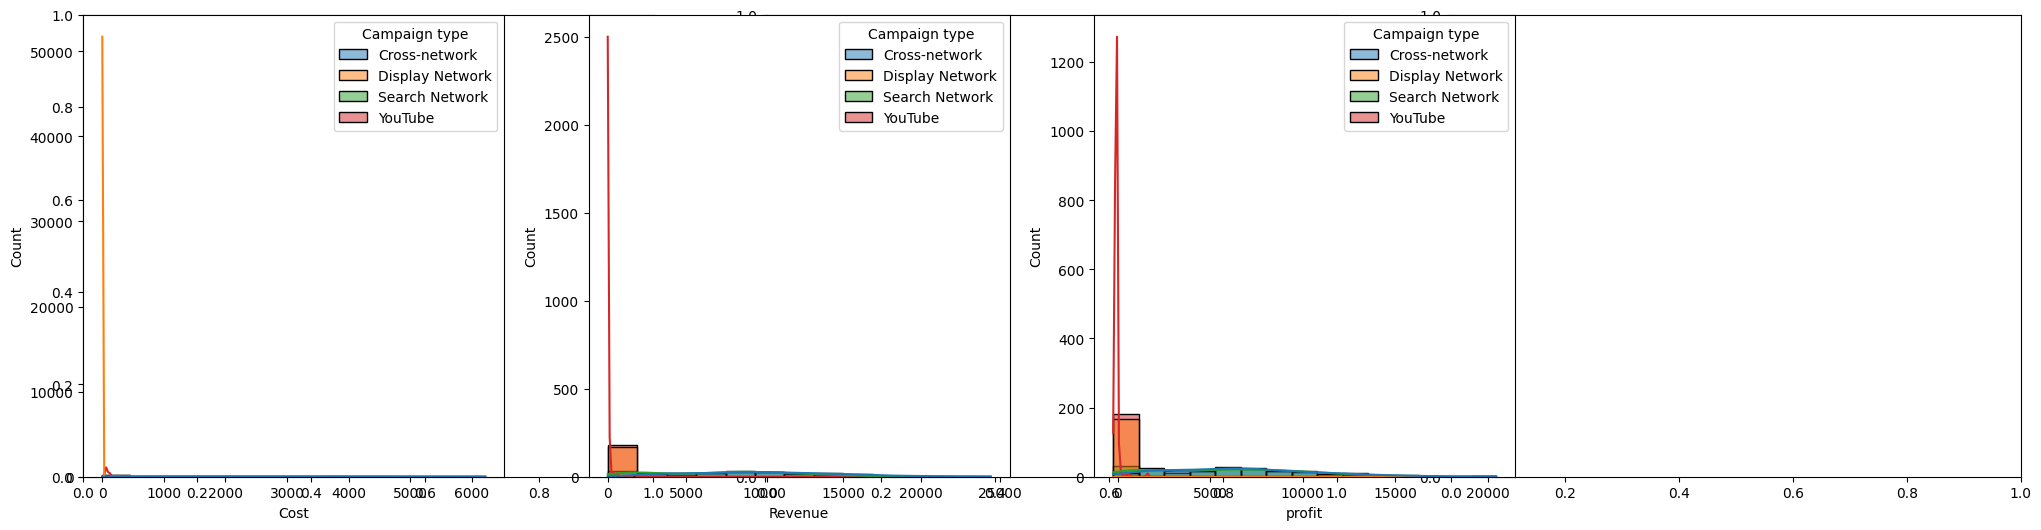

In [22]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=google_ads,x='Cost',kde=True,hue='Campaign type')
plt.subplot(142)
sns.histplot(data=google_ads,x='Revenue',kde=True,hue='Campaign type')
plt.subplot(143)
sns.histplot(data=google_ads,x='profit',kde=True,hue='Campaign type')
plt.show()

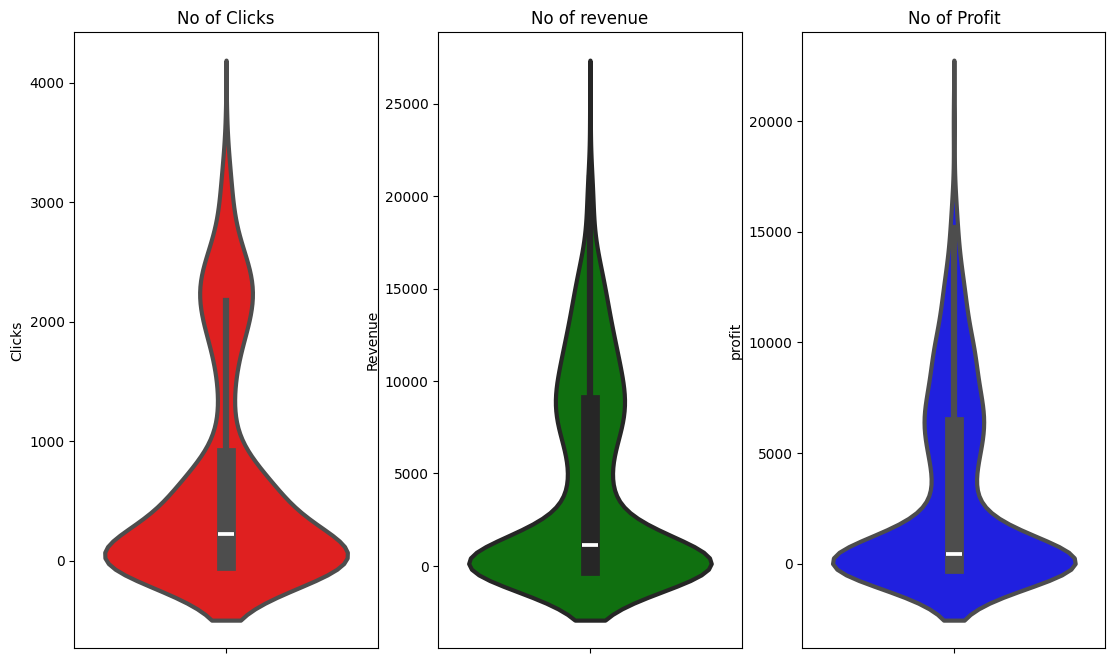

In [23]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('No of Clicks')
sns.violinplot(y='Clicks',data=google_ads,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('No of revenue')
sns.violinplot(y='Revenue',data=google_ads,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('No of Profit')
sns.violinplot(y='profit',data=google_ads,color='blue',linewidth=3)
plt.show()

C:\Users\nani8\AppData\Local\Temp\ipykernel_13068\1924764058.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=google_ads['Campaign type'],data=google_ads,palette ='bright',ax=ax[0],saturation=0.95)


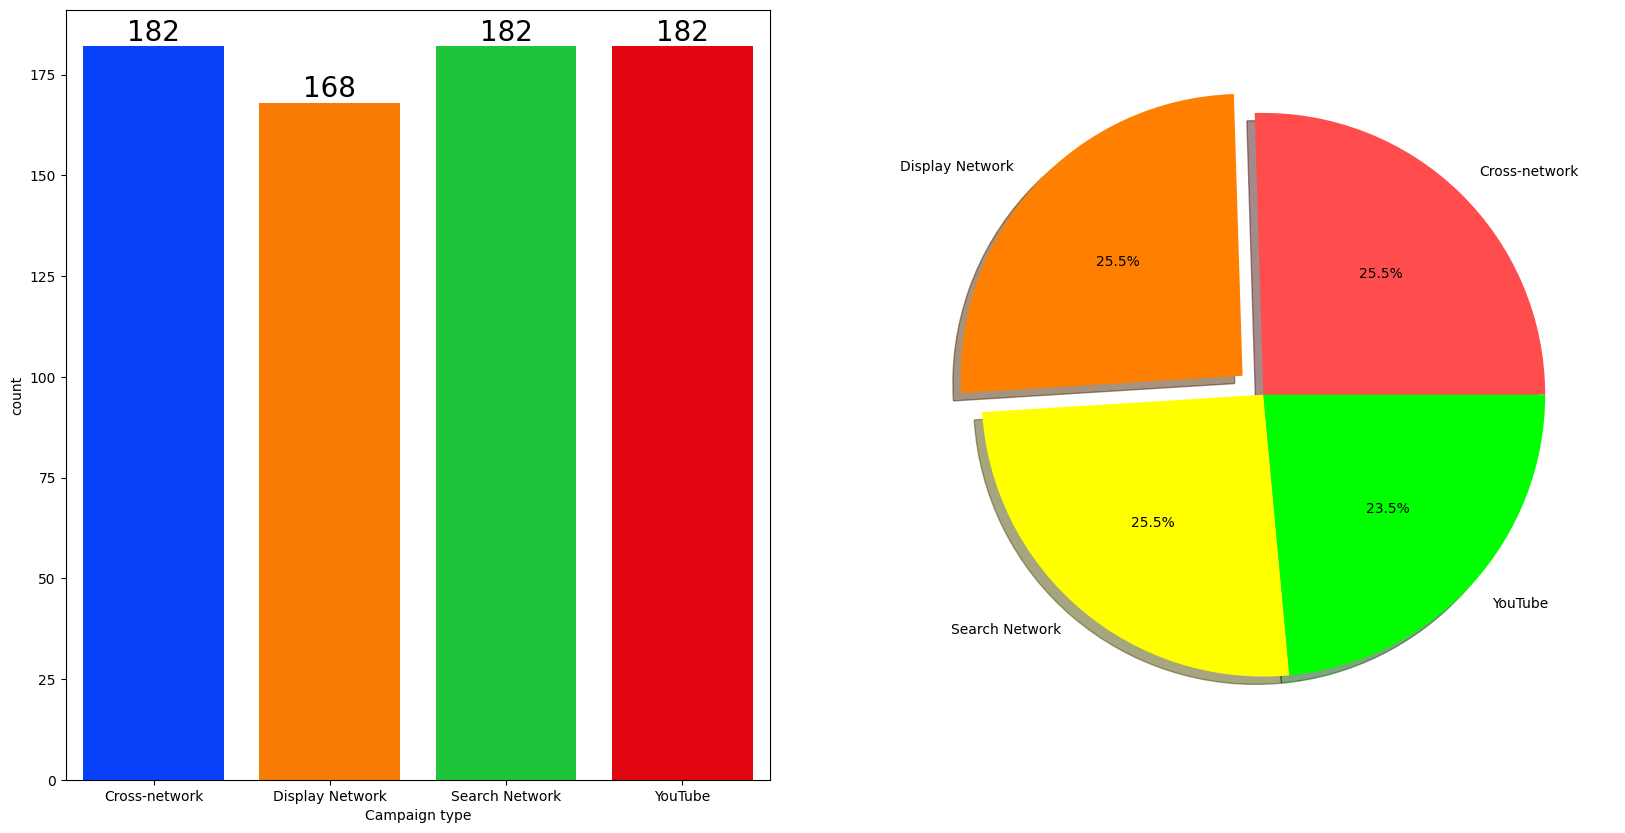

In [24]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=google_ads['Campaign type'],data=google_ads,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=google_ads['Campaign type'].value_counts(),labels=['Cross-network','Display Network','Search Network','YouTube'],explode=[0,0.1,0,0],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d', '#ff8000', '#ffff00', '#00ff00'])
plt.show()

In [25]:
grouped_df = google_ads.groupby('Campaign type')['profit'].sum()
grouped_df


Campaign type
Cross-network      1197760.0
Display Network        -57.6
Search Network     1089874.2
YouTube             -12783.5
Name: profit, dtype: float64

C:\Users\nani8\AppData\Local\Temp\ipykernel_13068\2902340384.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=grouped_df.index, y=grouped_df.values, palette='bright')


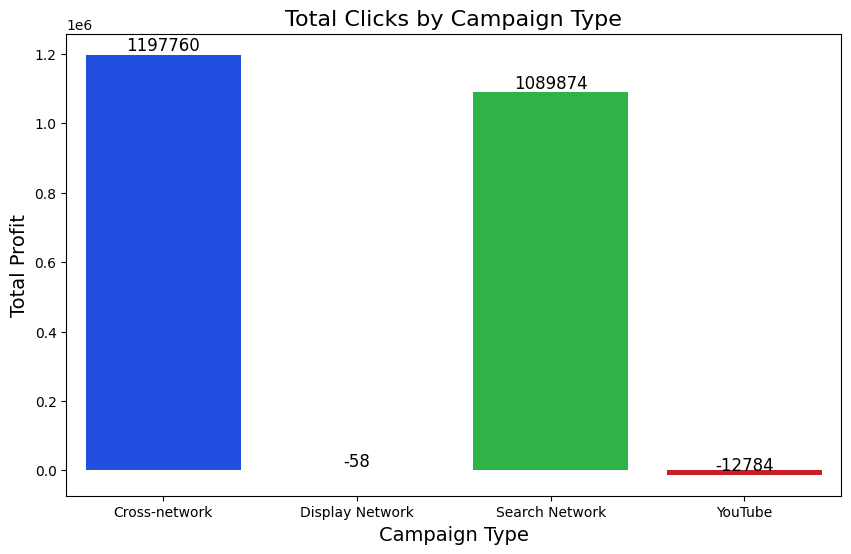

In [26]:

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=grouped_df.index, y=grouped_df.values, palette='bright')

# Adding labels and title
plt.xlabel('Campaign Type', fontsize=14)
plt.ylabel('Total Profit', fontsize=14)
plt.title('Total Clicks by Campaign Type', fontsize=16)

# Adding value labels on the bars
for index, value in enumerate(grouped_df.values):
    plt.text(index, value, f'{value:.0f}', ha='center', va='bottom', fontsize=12)

# Show the plot
plt.show()

In [27]:
grouped_df = google_ads.groupby('Campaign type')['Clicks'].sum()
grouped_df

Campaign type
Cross-network      385470.0
Display Network        25.0
Search Network      90721.0
YouTube              1002.0
Name: Clicks, dtype: float64

C:\Users\nani8\AppData\Local\Temp\ipykernel_13068\2296871002.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=grouped_df.index, y=grouped_df.values, palette='bright')


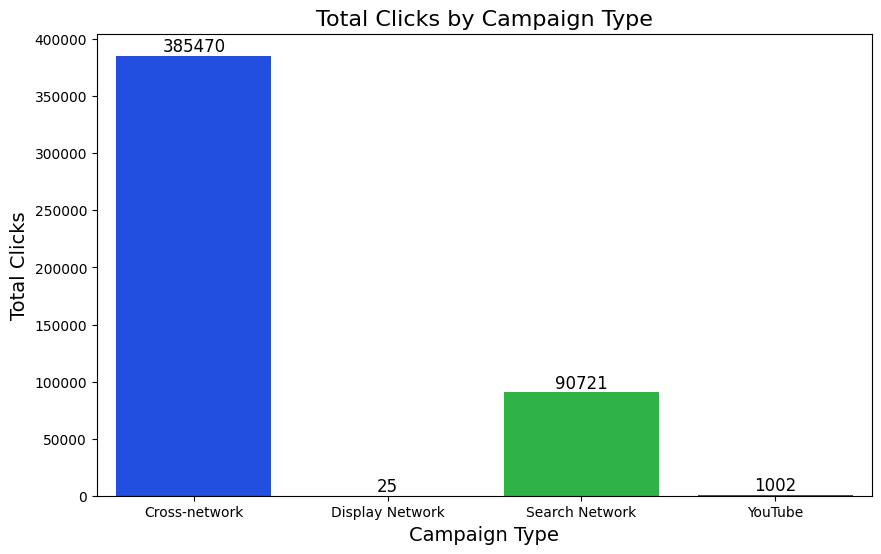

In [28]:

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=grouped_df.index, y=grouped_df.values, palette='bright')

# Adding labels and title
plt.xlabel('Campaign Type', fontsize=14)
plt.ylabel('Total Clicks', fontsize=14)
plt.title('Total Clicks by Campaign Type', fontsize=16)

# Adding value labels on the bars
for index, value in enumerate(grouped_df.values):
    plt.text(index, value, f'{value:.0f}', ha='center', va='bottom', fontsize=12)

# Show the plot
plt.show()

In [29]:
grouped_df = google_ads.groupby('Campaign type')['Revenue'].sum()
grouped_df

Campaign type
Cross-network      1775095.4
Display Network          0.0
Search Network     1348094.9
YouTube               4408.1
Name: Revenue, dtype: float64

C:\Users\nani8\AppData\Local\Temp\ipykernel_13068\1107341091.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=grouped_df.index, y=grouped_df.values, palette='bright')


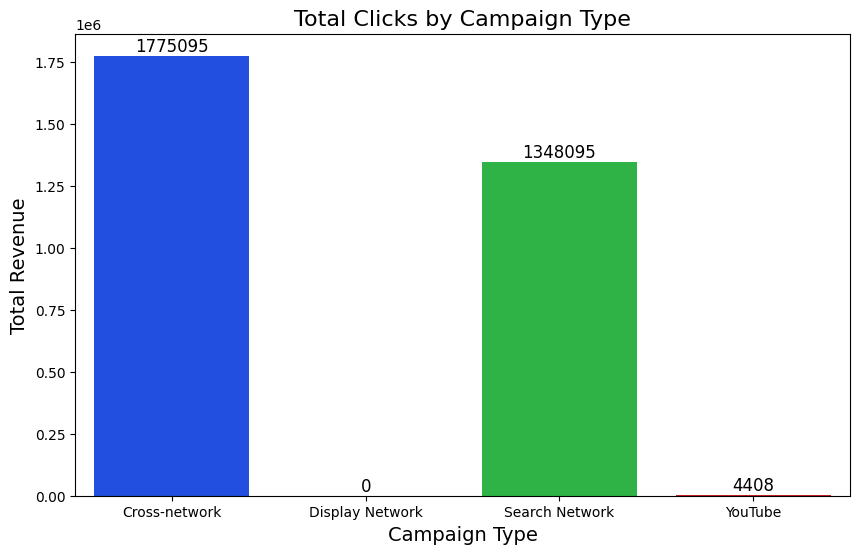

In [30]:

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=grouped_df.index, y=grouped_df.values, palette='bright')

# Adding labels and title
plt.xlabel('Campaign Type', fontsize=14)
plt.ylabel('Total Revenue', fontsize=14)
plt.title('Total Clicks by Campaign Type', fontsize=16)

# Adding value labels on the bars
for index, value in enumerate(grouped_df.values):
    plt.text(index, value, f'{value:.0f}', ha='center', va='bottom', fontsize=12)

# Show the plot
plt.show()

In [31]:
grouped_df = google_ads.groupby('Campaign type')['Impressions'].sum()
grouped_df

Campaign type
Cross-network      68183796.0
Display Network        9355.0
Search Network      1559847.0
YouTube             3966995.0
Name: Impressions, dtype: float64

C:\Users\nani8\AppData\Local\Temp\ipykernel_13068\3255874108.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=grouped_df.index, y=grouped_df.values, palette='bright')


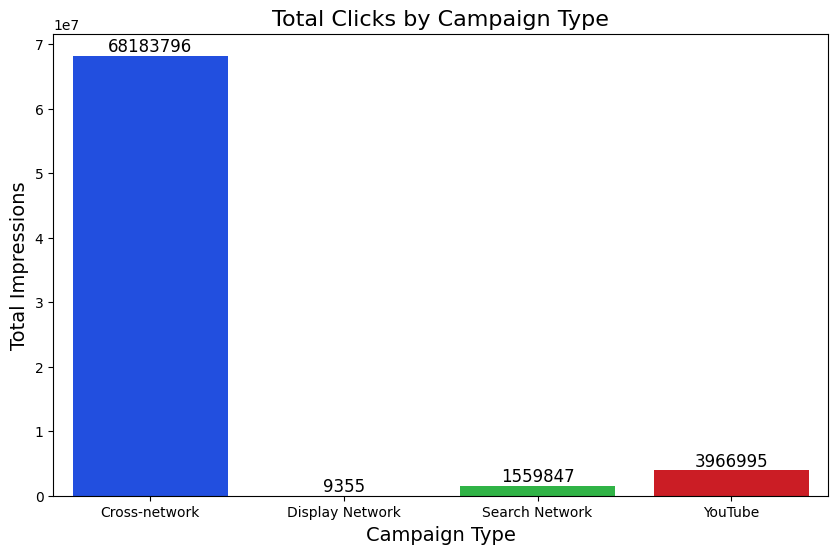

In [32]:

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=grouped_df.index, y=grouped_df.values, palette='bright')

# Adding labels and title
plt.xlabel('Campaign Type', fontsize=14)
plt.ylabel('Total Impressions', fontsize=14)
plt.title('Total Clicks by Campaign Type', fontsize=16)

# Adding value labels on the bars
for index, value in enumerate(grouped_df.values):
    plt.text(index, value, f'{value:.0f}', ha='center', va='bottom', fontsize=12)

# Show the plot
plt.show()

In [33]:
grouped_df = google_ads.groupby('Campaign type')['Cost'].sum()
grouped_df

Campaign type
Cross-network      577335.4
Display Network        57.6
Search Network     258220.7
YouTube             17191.6
Name: Cost, dtype: float64

C:\Users\nani8\AppData\Local\Temp\ipykernel_13068\2296871002.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=grouped_df.index, y=grouped_df.values, palette='bright')


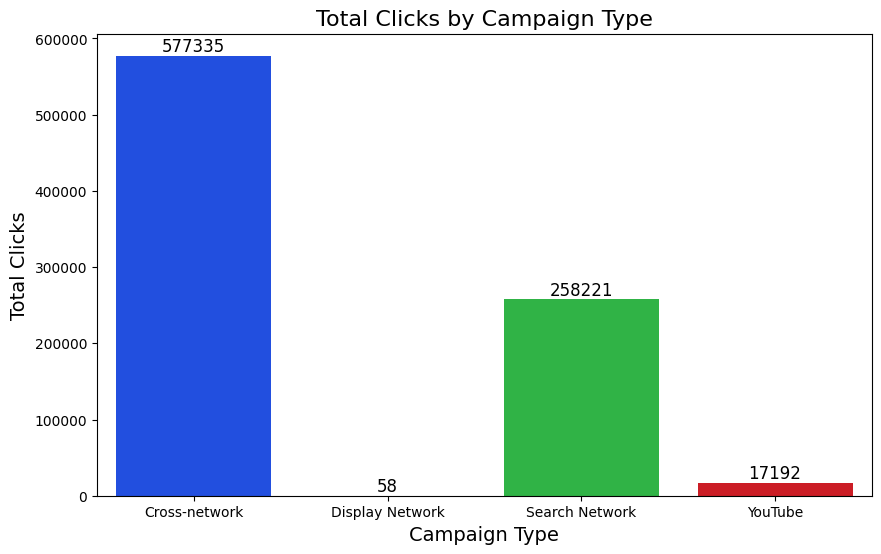

In [34]:

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=grouped_df.index, y=grouped_df.values, palette='bright')

# Adding labels and title
plt.xlabel('Campaign Type', fontsize=14)
plt.ylabel('Total Clicks', fontsize=14)
plt.title('Total Clicks by Campaign Type', fontsize=16)

# Adding value labels on the bars
for index, value in enumerate(grouped_df.values):
    plt.text(index, value, f'{value:.0f}', ha='center', va='bottom', fontsize=12)

# Show the plot
plt.show()